In [44]:
from nltk import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter


In [45]:
df= pd.read_csv("CSV Clean-Result Data PUBGM.csv")
df['Komentar_Negatif'] = np.where(df['Label'] == 'Negatif', df['review'], None)
df['Komentar_Positif'] = np.where(df['Label'] == 'Positif', df['review'], None)
df

,review,score,Label,Komentar_Negatif,Komentar_Positif
0,kualitas game ya tingkat segi nyaman main,4,Positif,None,kualitas game ya tingkat segi nyaman main
1,sistem gacha ahmpas pelit item top up uc mahal...,1,Negatif,sistem gacha ahmpas pelit item top up uc mahal...,None
2,gemnya bagus main gem jaring lancar tolong cep...,2,Negatif,gemnya bagus main gem jaring lancar tolong cep...,None
3,ngelag lgsg kluar g login g,1,Negatif,ngelag lgsg kluar g login g,None
4,tolong baik main ngebug sinyal oke gimana even...,4,Positif,None,tolong baik main ngebug sinyal oke gimana even...
...,...,...,...,...,...
1716,grafik kontrol udah bagus min kurang match mas...,4,Positif,None,grafik kontrol udah bagus min kurang match mas...
1717,to many cheating player kasih rate bintang klo...,4,Positif,None,to many cheating player kasih rate bintang klo...
1718,semenjak miramarnya pisah bug yg rasa hilang y...,5,Positif,None,semenjak miramarnya pisah bug yg rasa hilang y...
1719,update sanhok note x aman aman aja gak fps dro...,1,Negatif,update sanhok note x aman aman aja gak fps dro...,None


In [46]:
df_pemisahan= df
df_pemisahan=df_pemisahan.drop(['review'],axis=1)
df_pemisahan=df_pemisahan.drop(['Label'],axis=1)
df_pemisahan=df_pemisahan.fillna('')
df_pemisahan.to_csv('pemisahan data PUBGM.csv',index=False)

In [47]:

df_pemisahan = pd.read_csv('pemisahan data PUBGM.csv')
df_pemisahan['Komentar_Negatif'] = df_pemisahan['Komentar_Negatif'].fillna('')
df_pemisahan['Komentar_Positif'] = df_pemisahan['Komentar_Positif'].fillna('')

with open('id.stopwords.02.01.2016.txt', 'r') as f:
    stopwords = f.read().splitlines()

def tokenize_and_remove_stopwords(text, stopwords):
    tokens = text.split()
    tokens = [token for token in tokens if token.lower() not in stopwords]
    return tokens

df_pemisahan['tokens_negatif'] = df_pemisahan['Komentar_Negatif'].apply(lambda x: tokenize_and_remove_stopwords(x, stopwords))
df_pemisahan['tokens_positif'] = df_pemisahan['Komentar_Positif'].apply(lambda x: tokenize_and_remove_stopwords(x, stopwords))

df_pemisahan.head()


,score,Komentar_Negatif,Komentar_Positif,tokens_negatif,tokens_positif
0,4,,kualitas game ya tingkat segi nyaman main,[],"[kualitas, tingkat, nyaman]"
1,1,sistem gacha ahmpas pelit item top up uc mahal...,,"[gacha, ahmpas, pelit, item, top, up, uc, maha...",[]
2,2,gemnya bagus main gem jaring lancar tolong cep...,,"[gemnya, gem, lancar, cepat]",[]
3,1,ngelag lgsg kluar g login g,,"[ngelag, lgsg, kluar]",[]
4,4,,tolong baik main ngebug sinyal oke gimana even...,[],"[ngebug, oke, gimana, aman, aman]"


In [48]:

token_negatif = []

for kumpulan_token in df_pemisahan['tokens_negatif']:
    for token in kumpulan_token:
        token_negatif.append(token)

banyak_kata = Counter(token_negatif)

paling_banyak = banyak_kata.most_common()

paling_banyak


[('bug', 325),
 ('fps', 149),
 ('frame', 142),
 ('drop', 111),
 ('download', 95),
 ('lag', 81),
 ('berat', 79),
 ('lancar', 76),
 ('data', 73),
 ('ram', 70),
 ('kecewa', 69),
 ('suka', 69),
 ('server', 67),
 ('tencent', 66),
 ('device', 65),
 ('ulang', 60),
 ('seru', 56),
 ('suara', 55),
 ('nyaman', 55),
 ('gin', 55),
 ('hilang', 54),
 ('map', 53),
 ('habis', 53),
 ('susah', 51),
 ('patah', 51),
 ('mobile', 49),
 ('stabil', 49),
 ('aneh', 48),
 ('jelek', 48),
 ('wifi', 48),
 ('ni', 48),
 ('gb', 48),
 ('ngeframe', 45),
 ('rusak', 44),
 ('tembak', 43),
 ('tau', 43),
 ('ping', 42),
 ('season', 42),
 ('dah', 41),
 ('kaya', 41),
 ('gerak', 40),
 ('aplikasi', 40),
 ('kesini', 40),
 ('mode', 40),
 ('krafton', 39),
 ('buka', 39),
 ('nge', 38),
 ('ganti', 38),
 ('trus', 38),
 ('level', 37),
 ('cepat', 37),
 ('karakter', 37),
 ('hapus', 36),
 ('teman', 36),
 ('enak', 35),
 ('ms', 35),
 ('sampe', 35),
 ('kena', 35),
 ('tempur', 35),
 ('muncul', 34),
 ('loading', 33),
 ('in', 33),
 ('gimana', 33),

In [49]:

token_positif = []

for kumpulan_token in df_pemisahan['tokens_positif']:
    for token in kumpulan_token:
        token_positif.append(token)

banyak_kata2 = Counter(token_positif)

paling_banyak2 = banyak_kata2.most_common()

paling_banyak2


[('bug', 175),
 ('fps', 107),
 ('suka', 71),
 ('mobile', 65),
 ('seru', 58),
 ('frame', 53),
 ('mode', 46),
 ('ram', 40),
 ('kentang', 39),
 ('drop', 37),
 ('device', 36),
 ('lag', 36),
 ('nyaman', 35),
 ('berat', 29),
 ('tencent', 28),
 ('hilang', 28),
 ('download', 27),
 ('ny', 26),
 ('cepat', 25),
 ('harap', 25),
 ('ngelag', 24),
 ('dah', 24),
 ('rumah', 24),
 ('buka', 24),
 ('lancar', 23),
 ('kecewa', 23),
 ('susah', 23),
 ('kaya', 23),
 ('ubah', 22),
 ('map', 22),
 ('server', 22),
 ('oke', 21),
 ('keren', 21),
 ('lumayan', 21),
 ('enak', 20),
 ('patah', 20),
 ('sesuai', 20),
 ('stabil', 20),
 ('ping', 20),
 ('ms', 20),
 ('aman', 19),
 ('tempur', 19),
 ('kendala', 19),
 ('gb', 19),
 ('tingkat', 18),
 ('season', 18),
 ('mobil', 18),
 ('ganti', 18),
 ('nggak', 17),
 ('ngga', 17),
 ('pubgm', 17),
 ('tp', 17),
 ('item', 17),
 ('temu', 17),
 ('teman', 17),
 ('tembak', 17),
 ('ngeframe', 17),
 ('suara', 17),
 ('grafis', 16),
 ('m', 16),
 ('tpi', 16),
 ('d', 16),
 ('habis', 16),
 ('fix', 

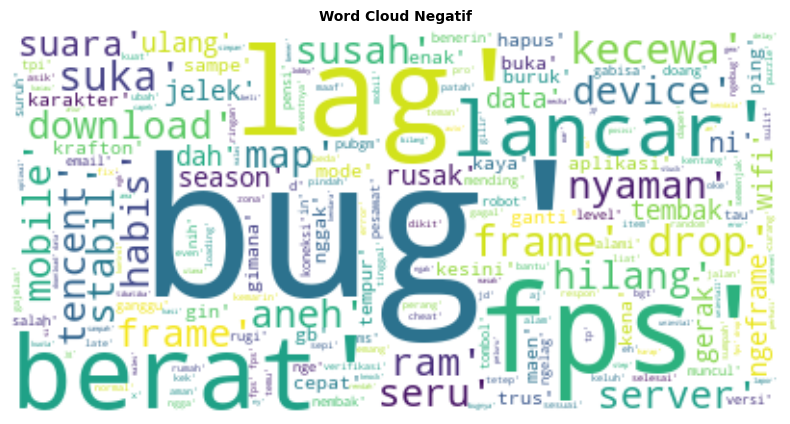

In [50]:
font = {'fontsize': 10, 'fontweight': 'bold'}

text_negatif = ' '.join(df_pemisahan['tokens_negatif'].dropna().astype(str).tolist())
wc = WordCloud(background_color='white', max_words=500, max_font_size=100).generate(text_negatif)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Negatif', fontdict=font)
plt.show()

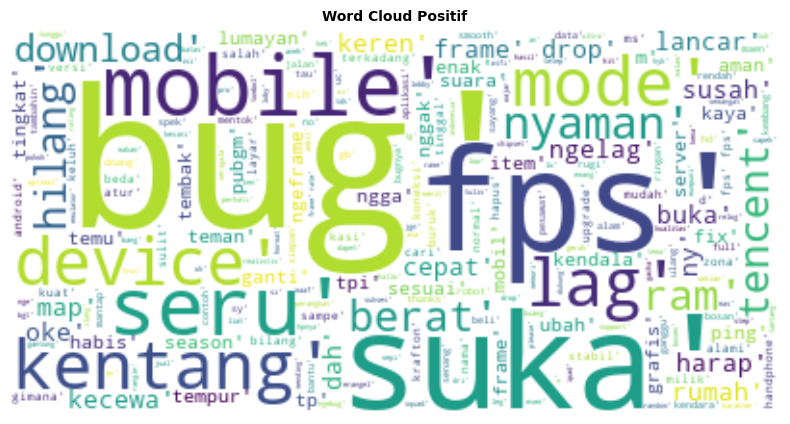

In [51]:
text_positif = ' '.join(df_pemisahan['tokens_positif'].dropna().astype(str).tolist())
wc = WordCloud(background_color='white', max_words=500, max_font_size=100).generate(text_positif)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
font = {'fontsize': 10, 'fontweight': 'bold'}
plt.title('Word Cloud Positif', fontdict=font)
plt.show()

In [52]:
total = df_pemisahan['score'].count()
negatif= df_pemisahan['Komentar_Negatif'].replace('',pd.NA).count()
positif= df_pemisahan['Komentar_Positif'].replace('',pd.NA).count()

print('Total Komentar:', total,
      '\nKomentar Negatif:',negatif,
      '\nKomentar Positif:', positif,
      )



Total Komentar: 1721 
Komentar Negatif: 1123 
Komentar Positif: 598


In [53]:
df_pemisahan['komentar_negatif'] = df_pemisahan['tokens_negatif'].apply(lambda x: ' '.join(x))
df_pemisahan['komentar_positif'] = df_pemisahan['tokens_positif'].apply(lambda x: ' '.join(x))
df_pemisahan = df_pemisahan.drop(['tokens_negatif', 'tokens_positif','Komentar_Negatif','Komentar_Positif'], axis=1)

df_pemisahan.to_csv('CSV Clean and separated PUBGM',index=False)

In [54]:
df_pemisahan.to_excel('excel Clean and separated PUBGM.xlsx',index=False)